# Mulilayer Classification on Image Data

dataset : https://www.kaggle.com/datasets/joosthazelzet/lego-brick-images

In [1]:
import sklearn

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import cv2
import os

In [2]:
DATA_PATH='datasets/Lego/train'

In [3]:
!ls datasets/Lego/train/

'11214 Bush 3M friction with Cross axle'  '3040 Roof Tile 1x2x45deg'
'18651 Cross Axle 2M with Snap friction'  '3069 Flat Tile 1x2'
'2357 Brick corner 1x2x2'		  '32123 half Bush'
'3003 Brick 2x2'			  '3673 Peg 2M'
'3004 Brick 1x2'			  '3713 Bush for Cross Axle'
'3005 Brick 1x1'			  '3794 Plate 1X2 with 1 Knob'
'3022 Plate 2x2'			  '6632 Technic Lever 3M'
'3023 Plate 1x2'			   _DS_Store
'3024 Plate 1x1'


## Load Dataset

In [4]:
def load_images(path):
    image_train=[]
    labels_train=[]

    for sub_folder in os.listdir(path):
        fullpath= os.path.join(path,sub_folder)
        print(fullpath)

        if not os.path.isdir(fullpath):
            continue

        images= os.listdir(fullpath)

        for image_filename in images:

            image_fullpath= os.path.join(fullpath,image_filename)

            if os.path.isdir(image_filename):
                continue

            img= cv2.imread(image_fullpath)

            image_train.append(img)
            labels_train.append(sub_folder)
    return np.array(image_train) , np.array(labels_train)

In [5]:
image_train, lables_train= load_images(DATA_PATH)

datasets/Lego/train/11214 Bush 3M friction with Cross axle
datasets/Lego/train/18651 Cross Axle 2M with Snap friction
datasets/Lego/train/2357 Brick corner 1x2x2
datasets/Lego/train/3003 Brick 2x2
datasets/Lego/train/3004 Brick 1x2
datasets/Lego/train/3005 Brick 1x1
datasets/Lego/train/3022 Plate 2x2
datasets/Lego/train/3023 Plate 1x2
datasets/Lego/train/3024 Plate 1x1
datasets/Lego/train/3040 Roof Tile 1x2x45deg
datasets/Lego/train/3069 Flat Tile 1x2
datasets/Lego/train/32123 half Bush
datasets/Lego/train/3673 Peg 2M
datasets/Lego/train/3713 Bush for Cross Axle
datasets/Lego/train/3794 Plate 1X2 with 1 Knob
datasets/Lego/train/6632 Technic Lever 3M
datasets/Lego/train/_DS_Store


In [6]:
image_train.shape

(6379, 200, 200, 3)

In [7]:
lables_train.shape

(6379,)

Label 3005 Brick 1x1


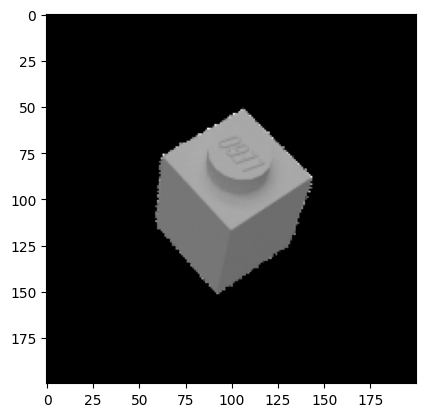

In [8]:
plt.imshow(image_train[2002])
print("Label",lables_train[2002])

## Preprocessing

In [9]:
X= image_train.reshape(image_train.shape[0],
                       image_train.shape[1]* image_train.shape[2]*image_train.shape[3])

In [10]:
X.shape

(6379, 120000)

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

Y= encoder.fit_transform(lables_train)

In [12]:
np.unique(Y), 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(X,Y,shuffle=True,test_size=0.2)

x_train.shape, y_train.shape

((5103, 120000), (5103,))

In [14]:
x_test.shape, y_test.shape

((1276, 120000), (1276,))

In [15]:
X.dtype , Y.dtype

(dtype('uint8'), dtype('int64'))

## BrickVision - Building

In [16]:
from sklearn.neural_network import MLPClassifier 

In [17]:
clf_image= MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100,100),
    solver='adam',
    max_iter=10,
    verbose=1
)

In [18]:
clf_image.fit(x_train,y_train)

Iteration 1, loss = 25.98306465
Iteration 2, loss = 12.57064407
Iteration 3, loss = 8.04354915
Iteration 4, loss = 6.90530785
Iteration 5, loss = 5.11474222
Iteration 6, loss = 4.99918182
Iteration 7, loss = 5.21816664
Iteration 8, loss = 3.21975412
Iteration 9, loss = 2.52038468
Iteration 10, loss = 2.55076399


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10, verbose=1)

In [19]:
y_pred=clf_image.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8307210031347962